In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\fedes\anaconda3\envs\ml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
data = pd.read_pickle('../data/interim/data.pickle')
data = data.loc[:, [col for col in data.columns if col not in ('ETo', 'Week', 'Month')]]
data

,DOY,SWC,P,Tmin,Tmax,RHmin,RHmax,U2,Rs,ETa
Day,,,,,,,,,,
2018-01-01,1.0,0.204000,1.520,5.940000,19.110000,42.00,99.50,2.51,7.01,NaN
2018-01-02,2.0,0.200000,3.050,12.610000,15.500000,42.30,72.60,3.35,5.39,NaN
2018-01-03,3.0,0.200000,0.760,6.720000,20.220000,35.90,86.50,2.17,8.78,NaN
2018-01-04,4.0,0.200000,0.000,17.330000,19.830000,35.20,64.60,3.69,2.93,NaN
2018-01-05,5.0,0.198000,0.000,6.780000,22.000000,39.80,96.50,0.82,8.97,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,269.0,0.256778,22.860,21.138889,28.500000,52.50,98.10,1.22,7.77,1.266006
2022-09-27,270.0,0.264276,0.000,21.666667,28.138889,41.25,83.85,0.75,17.27,2.773925
2022-09-28,271.0,0.260794,0.000,19.666667,26.944444,46.35,77.75,0.88,17.88,2.761086


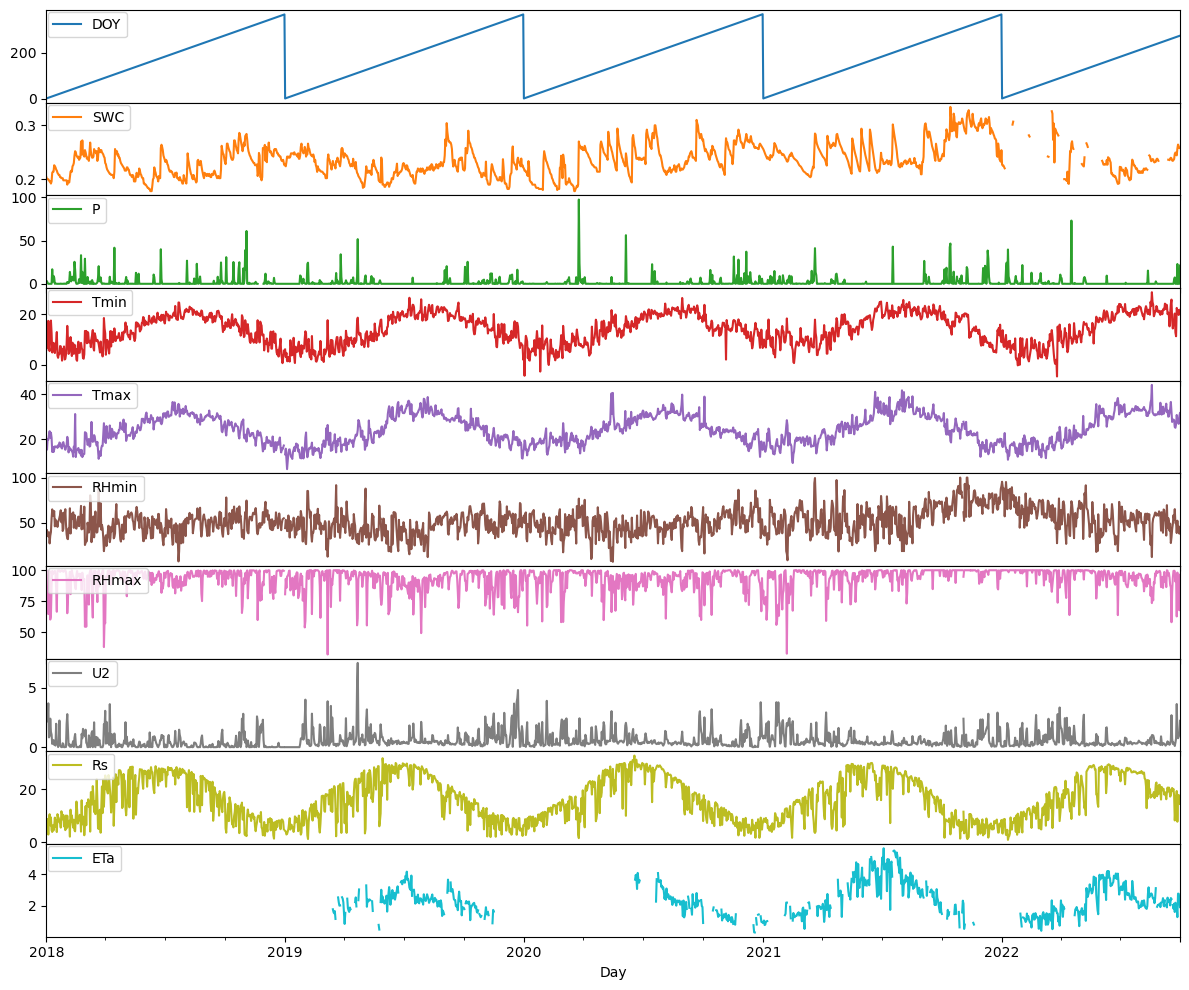

In [64]:
fig, axs = plt.subplots(len(data.columns), figsize=(12,10), sharex=True)
data.plot(subplots=True, ax=axs, legend=False)
for i in range(len(axs)):
    axs[i].legend(loc='upper left', bbox_to_anchor=(-0.005, 1.05))
fig.tight_layout()
fig.subplots_adjust(hspace=0)

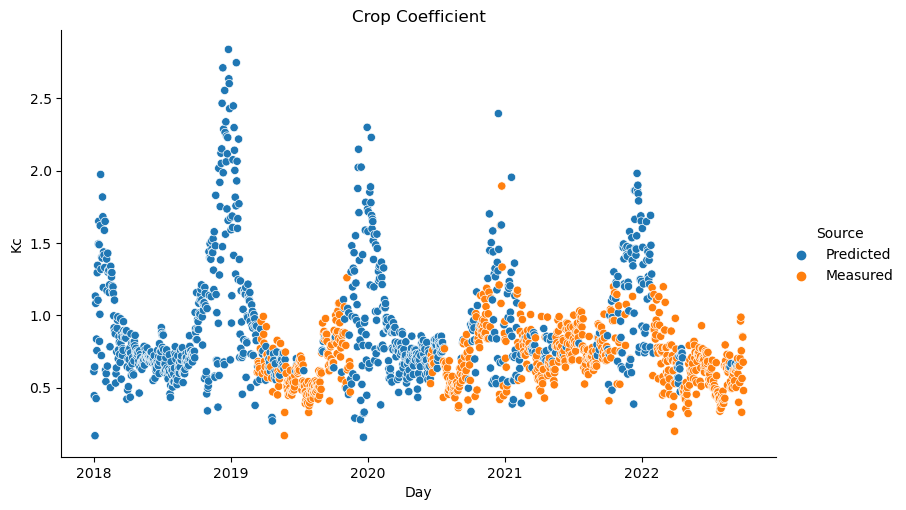

In [62]:
eta = pd.read_pickle('../data/predicted/predicted.pickle')
eta = eta.loc[eta['Kc']<5]
g = sns.relplot(eta,
            x='Day',
            y='Kc',
            hue='Source',
            aspect=1.6)
g.set(title='Crop Coefficient')